# CS 6220 Assignment 6

In [1]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load the Iris dataset
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header=None)
iris = iris.dropna()

### Output: Part 1

### A scatterplot matrix of scatterplots, with one scatterplot for each pairwise combination of features.

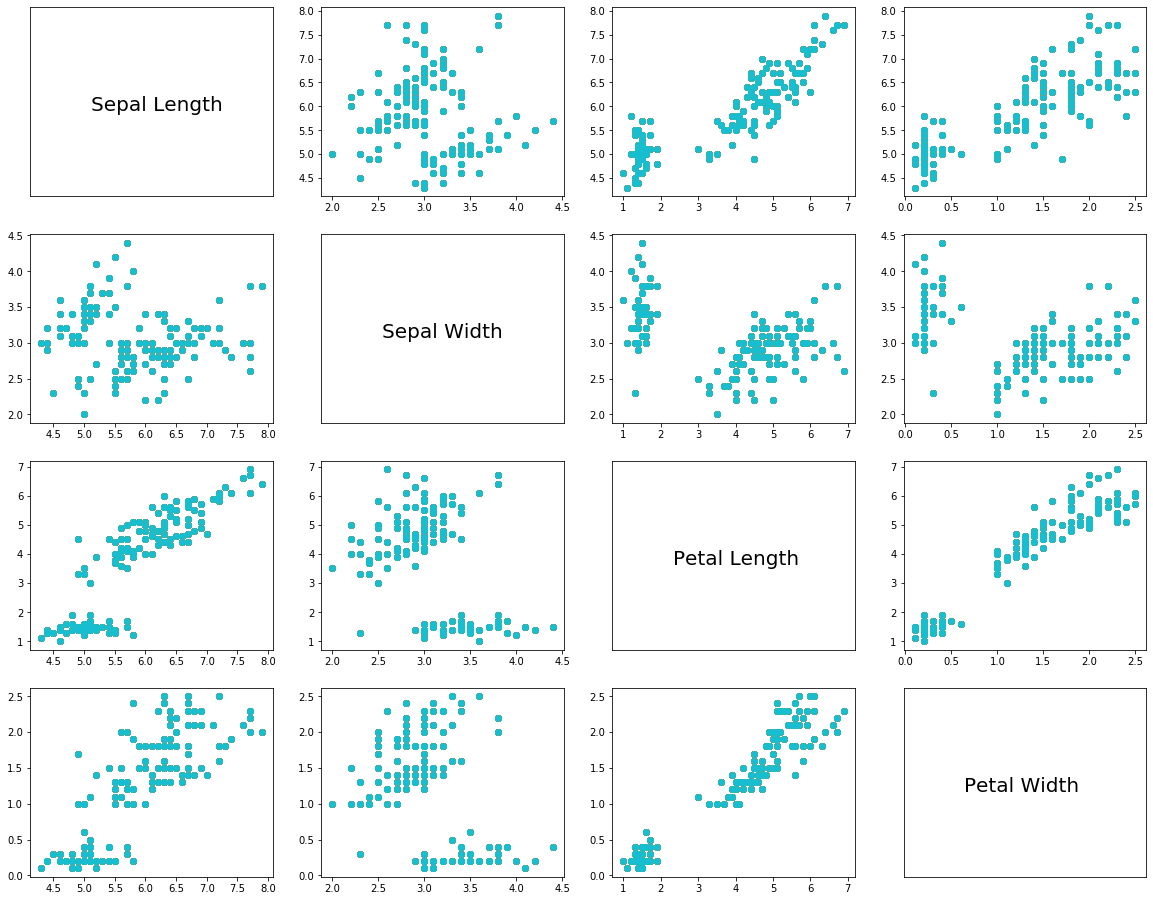

In [3]:
# Visualize the correlation between different features
pairs(iris)

### Output: Part 2

### A plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics.

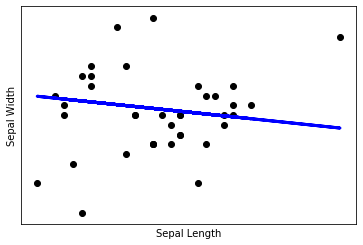

Coefficients:  [[-0.09586125]]
Mean squared error: 0.19
Variance score: -0.10


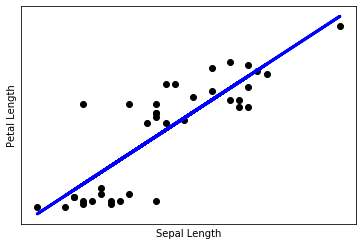

Coefficients:  [[1.85036691]]
Mean squared error: 0.81
Variance score: 0.71


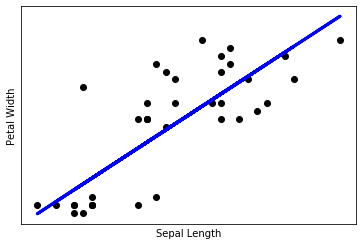

Coefficients:  [[0.76327883]]
Mean squared error: 0.22
Variance score: 0.61


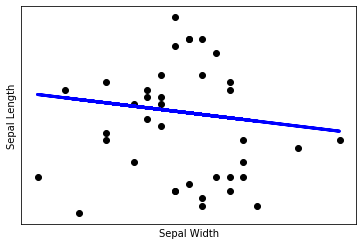

Coefficients:  [[-0.23028182]]
Mean squared error: 0.62
Variance score: -0.06


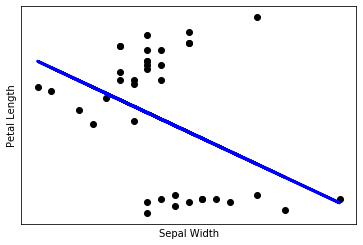

Coefficients:  [[-1.73457425]]
Mean squared error: 2.74
Variance score: 0.15


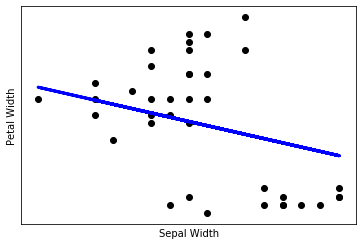

Coefficients:  [[-0.52564699]]
Mean squared error: 0.45
Variance score: 0.21


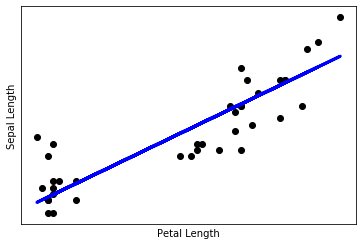

Coefficients:  [[0.42053295]]
Mean squared error: 0.16
Variance score: 0.75


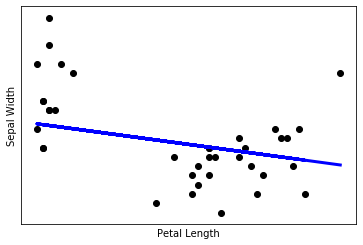

Coefficients:  [[-0.08683208]]
Mean squared error: 0.18
Variance score: 0.22


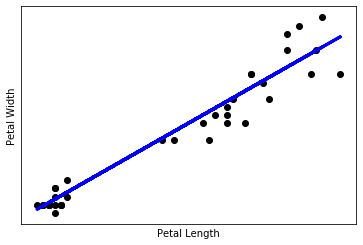

Coefficients:  [[0.41556154]]
Mean squared error: 0.04
Variance score: 0.93


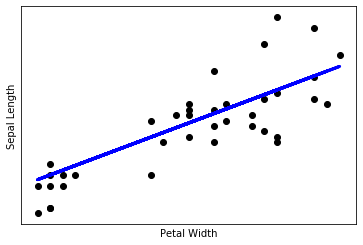

Coefficients:  [[0.86618562]]
Mean squared error: 0.26
Variance score: 0.67


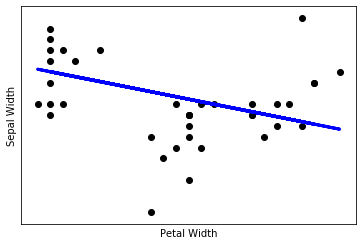

Coefficients:  [[-0.23118699]]
Mean squared error: 0.14
Variance score: -0.04


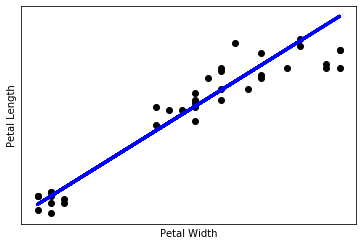

Coefficients:  [[2.29954725]]
Mean squared error: 0.30
Variance score: 0.89


In [4]:
# Code reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Code source: Jaques Grobler
# License: BSD 3 clause
# Code is modified using the above as example

from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
import numpy as np

# Predictor: independent variable
# Target: dependent variable
def linear_regression(data, predictor, target):
    # Divide the dataset into training and testing sets
    train, test = model_selection.train_test_split(data.values)
    X_train = train[:, predictor]
    X_test = test[:, predictor]
    y_train = train[:, target]
    y_test = test[:, target]
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr = regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # Plot outputs
    pl.scatter(X_test, y_test, color='black')
    pl.plot(X_test, y_pred, color='blue', linewidth=3)
    pl.xlabel(data.columns[predictor[0]])
    pl.ylabel(data.columns[target[0]])
    pl.xticks(())
    pl.yticks(())
    pl.show()
    
    # The coefficients
    print('Coefficients: ', regr.coef_)
    # The mean squared error
    print('Mean squared error: %.2f' % np.mean((y_pred - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X_test, y_test))

sepal_length = [0]
sepal_width = [1]
petal_length = [2]
petal_width = [3]
linear_regression(iris, sepal_length, sepal_width)
linear_regression(iris, sepal_length, petal_length)
linear_regression(iris, sepal_length, petal_width)
linear_regression(iris, sepal_width, sepal_length)
linear_regression(iris, sepal_width, petal_length)
linear_regression(iris, sepal_width, petal_width)
linear_regression(iris, petal_length, sepal_length)
linear_regression(iris, petal_length, sepal_width)
linear_regression(iris, petal_length, petal_width)
linear_regression(iris, petal_width, sepal_length)
linear_regression(iris, petal_width, sepal_width)
linear_regression(iris, petal_width, petal_length)

### Output: Part 3

### A plot of the best overall linear regression model you were able to generate using any combination of features (including the use of multiple features used in combination to predict a single feature), with corresponding model statistics.

The best overall linear regression model is determined by comparing mean square error. Mean square error is the average of the square of the errors. It illustrates how close a regression line is to a set of points, and amplifies the impact of outliers on the model's accuracy. Lower mean square error indicates better linear regression model. If mean square error is 0, it shows the linear regression model is perfect.

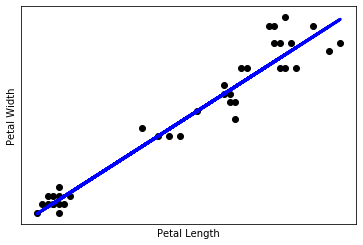

Coefficients:  [[0.41657816]]
Mean squared error: 0.04
Variance score: 0.94


In [5]:
# Code reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# Code source: Jaques Grobler
# License: BSD 3 clause
# Code is modified using the above as example

from sklearn.model_selection import train_test_split
from sklearn import model_selection, linear_model
import numpy as np

# Predictor: independent variable
# Target: dependent variable
def feature_combination(data, predictor, target):
    # Divide the dataset into training and testing sets
    train, test = model_selection.train_test_split(data.values)
    X_train = train[:, predictor]
    X_test = test[:, predictor]
    y_train = train[:, target]
    y_test = test[:, target]
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr = regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The mean squared error
    mean_squared_error = np.mean((y_pred - y_test) ** 2)
    
    return (mean_squared_error, predictor, target)
     
smallest_mean_squared_error = 100000000
best_predictor = []
best_target = []
# List all combination of features (including the use of multiple features used in combination to predict a single feature)
predictor_set = [[0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], 
                 [2], [2], [2], [2], [2], [2], [2], [3], [3], [3], [3], [3], [3], [3]]
target_set = [[1], [2], [3], [1,2], [1,3], [2,3], [1,2,3], [0], [2], [3], [0,2], [0,3], [2,3], [0,2,3], 
              [0], [1], [3], [0,1], [0,3], [1,3], [0,1,3], [0], [1], [2], [0,1], [0,2], [1,2], [0,1,2]]

# Compare results to get the best combination of features, which has the smallest mean squared error
for i in range(28):
    (mean_squared_error, predictor, target) = feature_combination(iris, predictor_set[i], target_set[i])
    if mean_squared_error < smallest_mean_squared_error:
        smallest_mean_squared_error = mean_squared_error
        best_predictor = predictor
        best_target = target
        
# Plot the best overall linear regression model with the best combination of features found above
linear_regression(iris, best_predictor, best_target)

The best overall linear regression model is the model with petal length as a predictor (independent) variable and petal width as a target (dependent) variable. It has mean squared error 0.04, being very close to 0; and variance score 0.94, being very close to 1.

### Questions

### 1. Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

Mean square error is the average of the square of the errors. It illustrates how close a regression line is to a set of points, and amplifies the impact of outliers on the model's accuracy. Lower mean square error indicates better linear regression model. If mean square error is 0, it shows the linear regression model is perfect. Variance score is the coefficient of determination R^2 of the prediction. The best possible score is 1, indicating perfect prediction.

Based upon the output provided for the linear models, by comparing mean square error (0 is perfect) and variance score (1 is perfect) values, the pair of features appears to be most predictive for one another is petal length and petal width.

### 2. Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

We choose to remove petal width feature. Removing petal width would have the least impact on the classification performance because petal width feature is the best/most easily predicted target (dependent) variable using the other three features as predictor (independent) variables. The loss of information on petal width can be made up/compensated well based upon other three features with regression models. In other words, petal width feature can be considered as redundant to some degree given other three features, so removing petal width would not affect the classification performance too much. 